<font size="5">**keras/TensorFlow nel rischio finanziario**

***Rischio di credito (german credit) e rischio di mercato***

> (c) 2026 Antonio Piemontese<br>
> Adattamento di [questo notebook ufficiale di Google](https://www.tensorflow.org/tutorials/quickstart/beginner?hl=it).

👉 La cella seguente è una cella TECNICA (indipendente dal tema TensorFlow qui trattato) per poter inserire facilmente immagini nel notebook (pre-caricate in `content`)

# La rilevazione dell'ambiente
**Il presente notebook funziona sia in Jupyter Notebook che VSC che Google Colab**.
A questo scopo, per garantire la compatibilità di alcune celle di codice con entrambi gli ambienti indicati, **rileviamo l'ambiente di esecuzione del notebook** (Jupyter/VSC oppure Google Colab): la seguente cella imposta una **variabile booleana `IN_COLAB`** che sarà poi **testata** da alcune celle del notebook (in particolare quelle di visualizzazione di immagini e PDF) per personalizzarne il comportamento a seconda dell'ambiente di esecuzione dell'ambiente rilevato.

In [3]:
# impostazione del TOGGLE BINARIO:
try:
    import google.colab                      # package disponibile SOLO in Google Colab
                                             # Imports the Google Colab module, which provides Colab-specific functionality
                                             # for the notebook environment.
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

print("Running on Colab:", IN_COLAB)


# IMPORT dei package necessari (necessari sia in JN, VSC che in Colab):
from IPython.display import Image, display   # import dei package di incorporamento e visualizzazione immagine (una tantum)
                                             # Image e display sono entrambi necessari a Jupyter Notebook
                                             # Google Colab utilizza solo Image
import os                                    # necessario a Google Colab per vedere da una cella codice
                                             # i contenuti del 'content'

Running on Colab: True


In [ ]:
# comando solo per Google Colab
if IN_COLAB:
    print(os.listdir('/content'))      # la print è necessaria, altrimenti NON visualizza nulla.
                                       # la funzione 'os.listdir()' infatti restituisce una lista, che poi occorre
                                       # assegnare ad una variabile o passare ad una funzione!

['.config', '.ipynb_checkpoints', 'sample_data']


Per garantire che i vari notebook funzionino correttamente sia in Colab che JN, le celle di visualizzazione delle immagini
useranno un codice one-liner di questo tipo:<br>
```text
    Image('/content/nome-immagine.png', width=500) if IN_COLAB else display(Image(filename='nome-immagine.png'))
```
Con Jupyter Notebook le immagini devono trovarsi nella stessa cartella del notebook (il path è infatti relativo).<br>
Con Google Colab devono essere caricate nella directory content dello storage volatile della sessione.<br>


**Lista delle immagini *png* necessarie a questo notebook**:
* `ranks.png`
* `keras_tf_support.png`
* `bias_vs_varianza.png`
* `bias_varianza_tradeoff.png`
* `mnist_dataset.png`
* `architettura_mnist_keras.png`
* `overfit_vs_underfit.png`
* `loss_function.png`
* `RMSE.png`
* `data_leakage_safeness.png`
* `rete_MLP.png`
* `rete_MLP_2.png`
* `softmax.png`
* `sigmoide.png`
* `funzioni_attivazione.png`

# Cos'è un tensore?

Informalmente è un'**array multi-dimensionale**. Per una definizione matematica più formale, legata all'algebra lineare ed agli spazi vettoriali, si veda la [voce di Wikipedia IT](https://it.wikipedia.org/wiki/Tensore).

Vediamo cosa è il **rango** di un tensore:

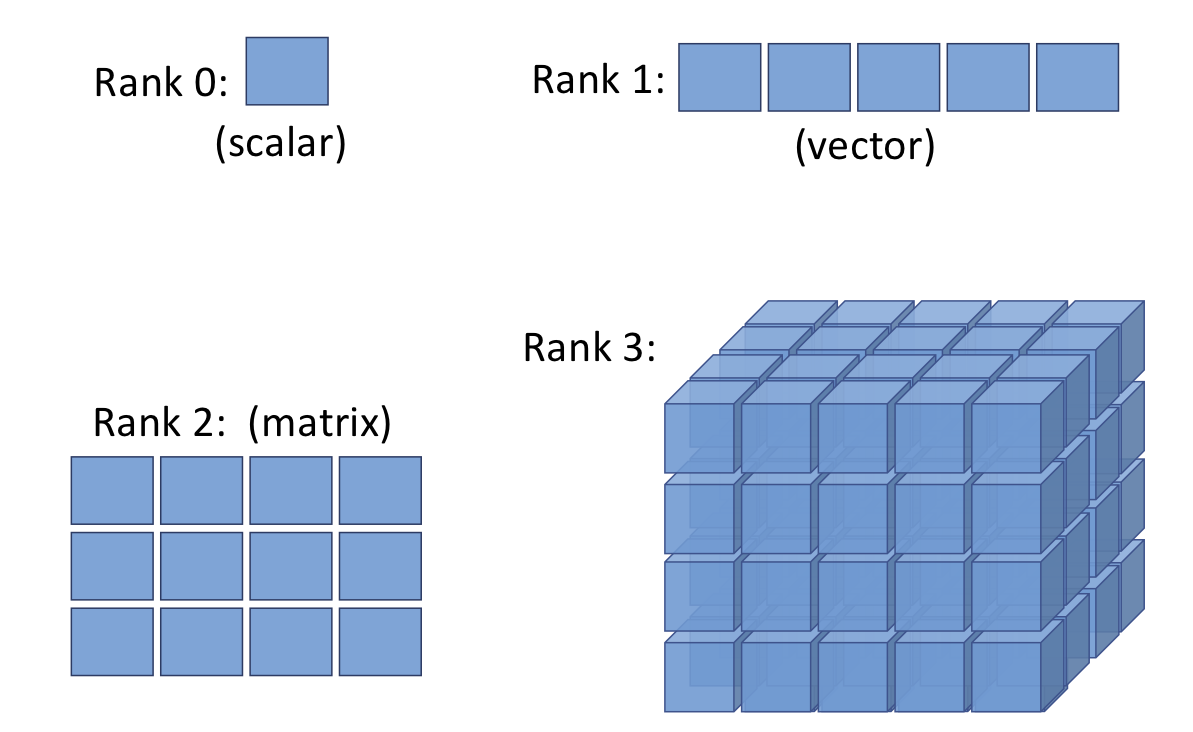

In [ ]:
Image('/content/ranks.png', width=500) if IN_COLAB else display(Image(filename='ranks.png'))

Un tensore ha un certo numero di dimensioni (il **rango**, aka ***rank***), ognuna associata ad un certo numero di componenti (***shape***).

# Cos'è TensorFlow?

TensorFlow è una **libreria open source**, leader di mercato, sviluppata da [Google Brain](https://www.databricks.com/it/glossary/tensorflow-guide), per il machine learning e il deep learning, utilizzata per costruire, addestrare e implementare **modelli di intelligenza artificiale su CPU, GPU e TPU**. Supporta linguaggi come **Python**, C++ e Java, rendendola ideale per applicazioni su larga scala, inclusi dispositivi mobili e web.

TensorFlow fornisce una API **scalabile e multi-piattaforma** per implementare ed eseguire <u>algoritmi di Machine Learning</u>.

E' un software *open-source* prodotto e sostenuto da Google, con una grande comunità di supporto e moltissime risorse disponibili on-line, facilmente accessibili. Un grande team di esperti <u>migliora ed espande</u> TensorFlow in modo continuativo.

La release 0 è del 2015, la prima stabile (1.0) del 2017, l'attuale (2.X) del 2019, che è stata una major release profondamente rivista.<br>
**📌 Questo corso utilizza la versione 2.19.**

La principale novità della release 2.0 è stata la computazione **dinamica** (anzichè statica) dei grafi, anche detta *eager execution*. Inoltre TensorFlow 2 è molto più simile a *Python* e *numpy* che la v 1. e dunque risulta familiare ad un utente Python.

Una importante caratteristica di TensorFlow è la possibilità di funzionamento con **CPU o GPU, anche multiple** (la modalità raccomandata per le prestazioni molto migliori, anche di 5/6 volte). E' molto utile per allenare in modo efficiente <u>reti profonde su grandi dataset</u>. Vedi [qui](https://www.tensorflow.org/guide/gpu) su come usare le GPU con *TensorFlow*.

Infine, TensorFlow supporta il deployment su piattaforme ***mobile***.

In breve tempo TensorFlow è diventata la libreria di deep learning **più adottata** in ambito industriale. In ambito accademico, e non solo, la piattaforma di DL più diffusa è ormai PyTorch.
Se volete/potete imparare UNA sola piattaforma di DL , consiglio PyTorch.

Come vedremo adesso, TensorFlow, che è una API *low-level*, può essere incapsulata da [***keras***](https://www.tensorflow.org/guide/keras?hl=it), un'API *high_level*, più astratta e di facile utilizzo.

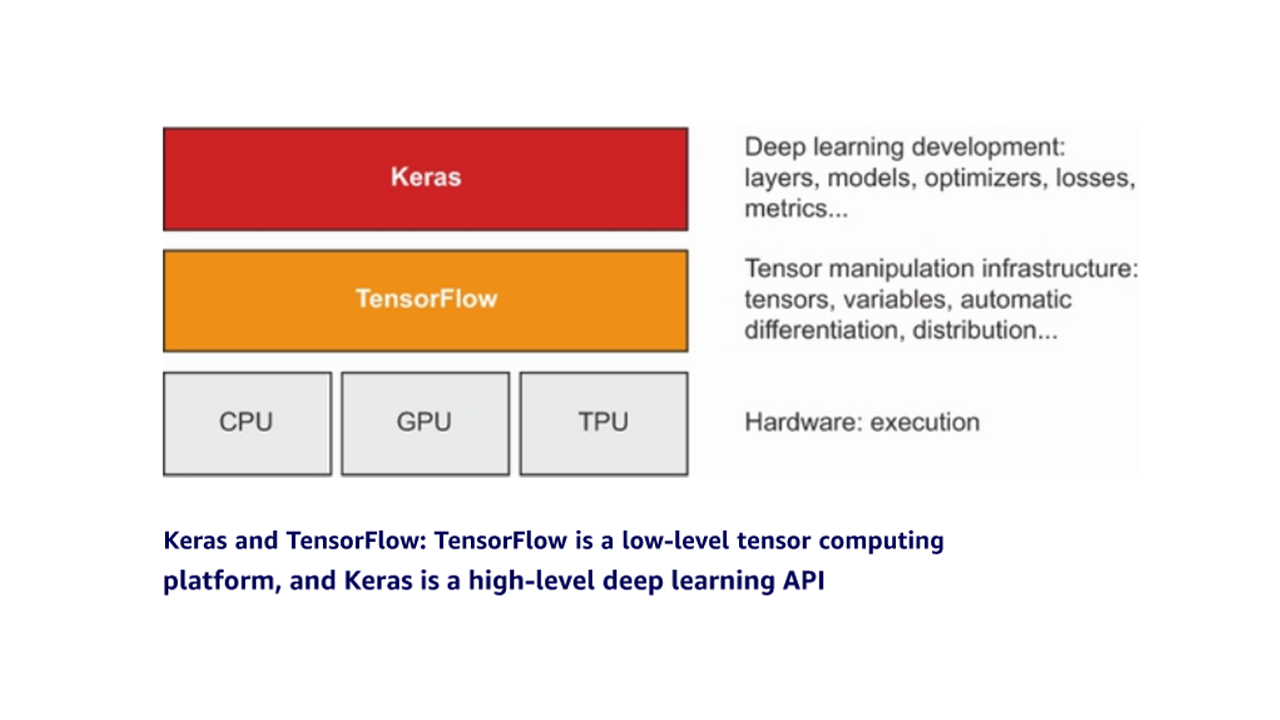

In [ ]:
Image('/content/keras_tf_support.png', width=800) if IN_COLAB else display(Image(filename='keras_tf_support.png'))

---
Questo notebook di introduzione utilizza Keras per:

1. Caricare un dataset già pronto.
2. Costruire un modello di machine learning basato su **rete neurale** per **classificare immagini**.
3. Addestrare la rete neurale (il modello).
4. Valutare l’accuratezza del modello.

---

# Configurare TensorFlow

Importare TensorFlow nel notebook, per iniziare:

In [ ]:
import tensorflow as tf   # qualche secondo --> versione 2.19.0 (l'ultima a febbraio 2026 è la 2.20 --> vedi sito TensorFlow)
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


---
👉 Se si sta seguendo questo notebook nel <u>proprio ambiente di sviluppo</u> (Jupyter, Visual Studio Code, ecc), anziché in [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), consultare la [guida di installazione](https://www.tensorflow.org/install) per configurare correttamente TensorFlow.

Nota: in questo caso, prima di installare TensorFlow 2 nel proprio ambiente, assicurarsi di aver aggiornato il gestore dei package python `pip` all’ultima versione . Per i dettagli consultare la succitata guida di installazione. Come gestore dei package Python, comunque, è sempre **meglio usare *conda* [AP]**.

---
👉 Se si usa TensorFlow e/o PyTorch <u>proprio ambiente di sviluppo</u>, anziché in Colab, è sempre consigliato installare la **versione 3.11 di Python** (perfettamente compatibile con PyTorch e TF).<br>
Google Colab, invece, gestisce per noi queste compatibilità! (non dobbiamo preoccuparcene).

---

# I dataset di keras

`keras` rende disponibili diversi dataset per provare algoritmi di Machine Learning e Deep Learning:

* tf.keras.datasets.**boston_housing** [506,13] (**real estate: prezzi**) - <u>TABELLA STRUTTURATA</u>
* tf.keras.datasets.**california_housing** [20.640,8] (**real estate: prezzi**) - <u>TABELLA STRUTTURATA</u>
* tf.keras.datasets.**cifar10** [60.000, 32,32] (**immagini a colori 32x32** etichettate su 10  categorie) - <u>IMMAGINI A COLORE</u>
* tf.keras.datasets.**cifar100** [60.000, 32,32] (**immagini a colori 32x32** etichettate su 100 categorie fini e 20 categorie ampie) - <u>IMMAGINI A COLORE</u>
* tf.keras.datasets.**imdb** (**25.000 recensioni di film dal DB IMDB**) - <u>TESTI</u>
* tf.keras.datasets.**mnist** [70.000,28,28] (70.000 immagini 16x16 in scale di grigio di **numeri 0-9**) - <u>IMMAGINI IN GRIGIO</u>
* tf.keras.datasets.**fashion_mnist** [70.000, 28,28] (70.000 immagini 28x28 in scale di grigio su **10 categorie fashion**, è un'alternativa a mnist) - <u>IMMAGINI IN GRIGIO</u>

Useremo il penultimo (*mnist*), un dataset famosissimo. Vedi in proposito anche la [voce Wikipedia IT](https://it.wikipedia.org/wiki/MNIST_database).<br>

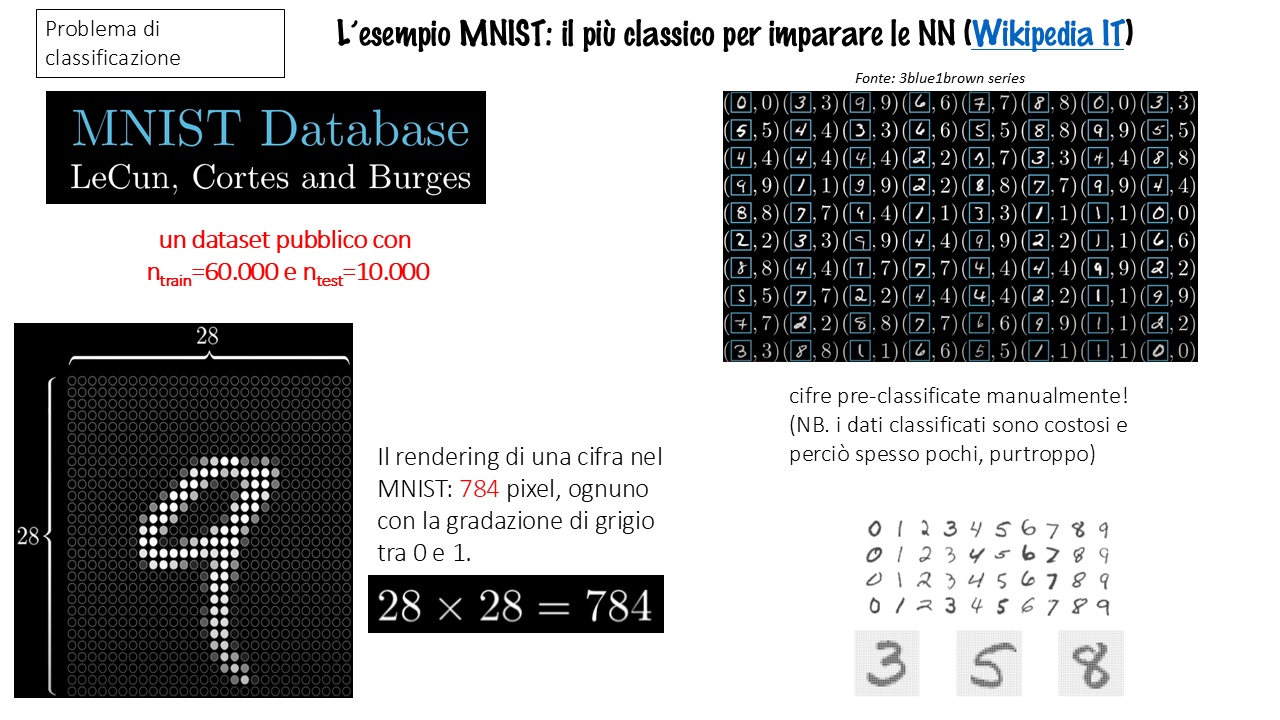

In [ ]:
Image('/content/mnist_dataset.png', width=1000) if IN_COLAB else display(Image(filename='mnist_dataset.png'))

---
⭐ Tutto il codice seguente è **RIUSABILE al 100%** con qualsiasi dei dataset di *keras* prima elencati.

---

# Caricare e preparare il dataset *MNIST*.

In [ ]:
mnist = tf.keras.datasets.mnist   # la tipica struttura gerarchica delle librerie Python (scikit-learn, tensorflow, pytorch)
print(type(mnist))                # la classe di mnist
mnist                             # i contenuti di mnist?!

<class 'module'>


<module 'keras.datasets.mnist' from '/usr/local/lib/python3.12/dist-packages/keras/datasets/mnist/__init__.py'>

Il modulo `mnist` di *keras*, come anche gli altri sopra elencati, NON è un dataset, ma appunto un **modulo Python** che contiene funzioni (principalmente `load_data()`) per estrarli e caricarli in python.<br>
Quindi direttamente su `mnist` si può fare poco: **non contiene i dati, ma solo il modo per caricarli**.


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # il caricamento in python delle array

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# Che approccio usare?
👉 A questo punto, dopo aver introdotto TensorFlow e keras e dopo aver caricato in python il dataset `mnist`, siamo pronti a costruire il nostro **classificatore**.

Lo faremo in due modi:
* nel modo **informatico** (da *nerd*?): conta solo il software, il resto è una scatola nera ❌
* nel modo **matematico-informatico**: si cerca di capire cosa stiamo facendo: assunzioni, tecniche, parametri, risultati ✅

Useremo quindi il secondo approccio.

# Capire concetti e significati ✅

In realtà nel Deep Learning è essenziale:
* fare **un'analisi esplorativa** dei dati (prima di costruire un modello predittivo!), anche detta EDA (*Explorative Data Analysis*)
* conoscere le **assunzioni sottostanti** (soprattutto se si vuole stimare l'incertezza)
* conoscere le **tecniche** di ottimizzazione
* conoscere il **significato dei vari iper-parametri** degli algoritmi e quando/come impostarli
* saper **interpretare i risultati** degli algoritmi

## Esaminare i contenuti del dataset MNIST

Un dataset Keras (come `tf.keras.datasets.mnist`), dal punto di vista dei dati, è semplicemente un **insieme di 4 array NumPy già preparate**.

Questi dataset, infatti, nascono con uno scopo preciso: **addestrare e valutare** modelli di machine learning in modo corretto e confrontabile. Quindi servono:
* feature/predittori e risposta di **training**
* feature/predittori e risposta di **test**

I dataset keras sono quindi già **suddivisi** in questo modo.

Occorre solo **caricarle in python** con la funzione `load_data`, resa disponibile dal modulo `mnist` e da tutti gli altri moduli dataset visti prima, assegnando le 4 array **separatamente**, in questo modo:

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # il caricamento in python delle array

## Data Leakage

La suddivisione del dataset in train e test deve essere fatta **prima** di eventuali trasformazioni del dataset quali:
* standardizzazioni
* feature selection
* ecc

per evitare il problema del [*data leakage*](https://en.wikipedia.org/wiki/Leakage_(machine_learning)) che può alterare l'affidabilità dle modello.



In [ ]:
Image('/content/data_leakage_safeness.png') if IN_COLAB else display(Image(filename='data_leakage_safeness.png'))

## DRIFT ??

**DRIFT** (DDoDS)

## EDA (*Explorative Data Analysis*)



A questo punto ogni array è esaminabile nel modo consueto (di una array numpy), ad esempio guardando: **classe**, forma (***shape***), contenuto, distribuzioni, esempi visivi.<br>
La *shape*, in particolare, mostrerà il numero di esempi, la risoluzione delle immagini e la dimensione delle etichette.

In [ ]:
print(f"Classe di x_train: {type(x_train)}")               # le CLASSI
print(f"Classe di y_train: {type(y_train)}")
print(f"Classe di x_test: {type(x_test)}")
print(f"Classe di y_test: {type(y_test)}")

print(f"Shape di x_train: {x_train.shape}")                # le SHAPE
print(f"Shape di y_train: {y_train.shape}")
print(f"Shape di x_test: {x_test.shape}")
print(f"Shape di y_test: {y_test.shape}")

Classe di x_train: <class 'numpy.ndarray'>
Classe di y_train: <class 'numpy.ndarray'>
Classe di x_test: <class 'numpy.ndarray'>
Classe di y_test: <class 'numpy.ndarray'>
Shape di x_train: (60000, 28, 28)
Shape di y_train: (60000,)
Shape di x_test: (10000, 28, 28)
Shape di y_test: (10000,)


Vediamo ora una di queste array (`x_train`):

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

`x_train` è un TENSORE di rango 3, il metodo `shape` fornisce la cardinalità di ogni dimensione.

In [ ]:
# molti pixel sono 0, ma non tutti
x_train[0,9,9]  # è il pixel (10,10) della prima immagine (Python conta da 0!)

np.uint8(156)

I valori dei pixel delle immagini MNIST vanno **da 0 a 255**.


In [ ]:
print(x_train.min())
print(x_train.max())

0
255


E' opportuno **normalizzarli al range [0,1]**, <u>dividendoli per 255</u>. Sull'utilità di questa trasformazione vedi [questa chat](https://chatgpt.com/share/6991c0ce-6450-8012-b4da-da1edf22bdac).

Questa operazione converte il data type da intero a floating point (virgola mobile).

In [ ]:
# operazione eseguibile SOLO UNA VOLTA!! (altrimenti ricaricare il dataset)
x_train, x_test = x_train / 255.0, x_test / 255.0         # divisione per 255 (si noti il doppio input ed il doppio output)
print(x_train.min())
print(x_train.max())
x_train[0,9,9]


0.0
1.0


np.float64(0.611764705882353)

## Configurare la rete

Per prima cosa definiamo **l'architettura** del modello (la rete neurale), cioè come è fatta: quanti **layer** (anche detti, strati o livelli), che **tipo** di layer, **quanti neuroni** per layer, come sono **collegati** i neuroni dei vari layer.

📌 **Non** è ancora il FIT (per quello vedi più avanti).



## Reti MLP

La prossima cella descrive una rete neurale MLP con due livelli nascosti (con $K_1 = 256$ e $K_2 = 128$), adatta al problema di classificazione del MNIST.

Vediamo prima cosa è una rete MLP.

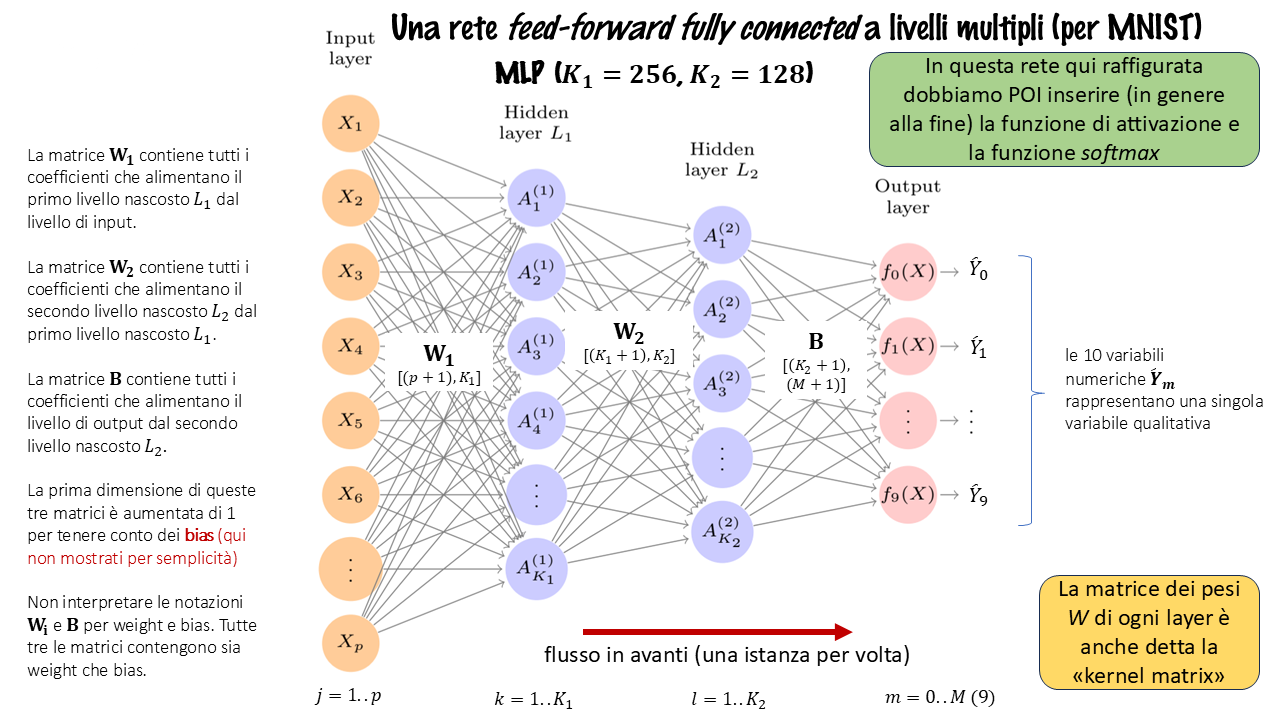

In [4]:
Image('/content/rete_MLP.png', width=1000) if IN_COLAB else display(Image(filename='rete_MLP.png'))

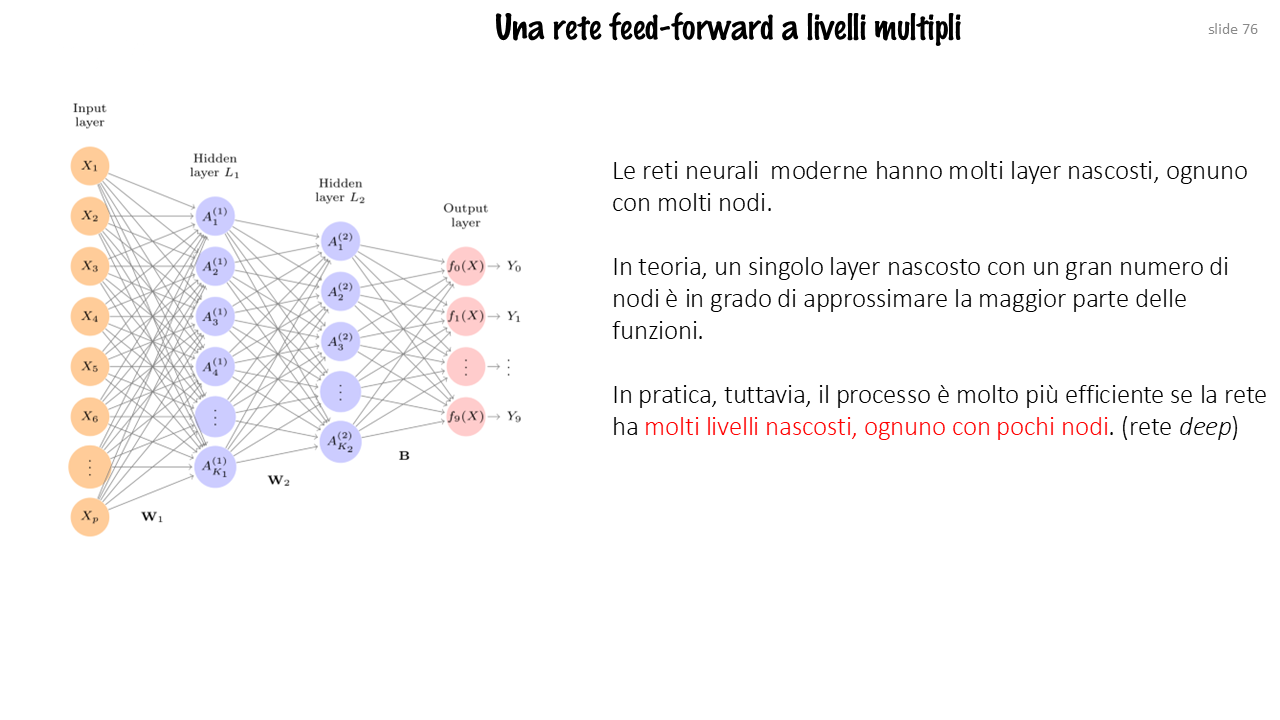

In [5]:
Image('/content/rete_MLP_2.png', width=1000) if IN_COLAB else display(Image(filename='rete_MLP_2.png'))

---
**Relazioni tra reti neurali e modelli lineari**:
- Una rete neurale feed-forward e i modelli lineari sono strettamente collegati: la prima nasce come estensione naturale dei secondi. In effetti, una rete neurale feed-forward senza non linearità è un modello lineare.
- Un classificatore feed-forward senza livelli nascosti  e con una funzione di attivazione sigmoide equivale ad una regressione logistica (combinazione lineare più sigmoide).

Vedi anche [questa chat](https://chatgpt.com/share/698e592b-b4d4-8012-9185-93114654a165).

**Torniamo** alla configurazione della nostra rete MLP.

## Configurare la rete (...continua)

Creiamo l'architettura del modello con la funzione keras `tf.keras.Sequential`:

In [1]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),   # Definizione esplicita dell'input (le dimensioni di ogni immagine)
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

# la sintesi:
model.summary()

NameError: name 'tf' is not defined

La classe [`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) è utile per **impilare livelli** (*layer*): ogni livello ha un [tensore](https://www.tensorflow.org/guide/tensor) di input e un tensore di output. I livelli sono funzioni con una loro struttura matematica nota, che possono essere riutilizzate e hanno variabili addestrabili (i **parametri**).

La maggior parte dei modelli di TensorFlow (MLP, CNN, RNN, Transformer, ecc) è composta da livelli, secondo questo schema:

``` text
input → layer → layer → layer → output
```
>
> TensorFlow permette di costruire anche **altri tipi di modelli**:
> 1. funzioni matematiche pure, tipo<br>
> ```python
>     y = tf.matmul(x, W) + b  # è comunque un modello
> ```
> 2. modelli scritti a mano (*subclassing*)<br>
>   Si possono costruire architetture in cui la logica non è una semplice catena di layer.
>
> 3. algoritmi non deep learning

---

Questo modello utilizza i livelli [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) e [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout).


Vediamo l'analisi della rete di chatGPT 5.2:

In [ ]:
Image('/content/architettura_mnist_keras.png') if IN_COLAB else display(Image(filename='architettura_mnist_keras.png'))

La definizione/configurazione dell'architettura di una rete neurale è la fase nella quale **si decide** il numero di layer e di neuroni, come detto prima, ma anche:
* la modalità di **costruzione della rete in keras** (*Sequential* oppure *Functional API* oppure *Subclassing*)
* le **funzioni di attivazione** (qui *ReLU*)
* la presenza di **regolarizzazione** (*drop-out*)

Non ci sono ancora:
* la funzione di loss
* l'ottimizzatore
* l'addestramento (fit)

Questa fase è l’equivalente del progetto di un edificio prima della costruzione.

## Fare le previsioni

Per ogni esempio (immagine), il modello restituisce **un vettore di [logits](https://developers.google.com/machine-learning/glossary#logits)** o punteggi di [log-odds](https://developers.google.com/machine-learning/glossary#log-odds), uno per ciascuna classe.

In [ ]:
x_train.shape

In [ ]:
x_train[:1] # la prima immagine (la 0 - python conta da 0), con tutti i 784  (28x28)
            # è una array sparsa, cioè fatta soprattutto di 0

Per sapere cosa è una matrice sparsa, vedi [questa voce di Wikipedia EN](https://en.wikipedia.org/wiki/Sparse_matrix).

In [ ]:
predictions = model(x_train[:1]).numpy()



array([[ 0.04699305,  0.05675226, -0.00801627,  0.24570177,  0.6377157 ,
        -0.678688  , -0.54952025, -0.4497653 ,  0.07012843, -0.5936615 ]],
      dtype=float32)

Il metodo keras/TF `.numpy()` **converte un tensore in una array *numpy***. C'è un metodo analogo anche in *PyTorch*. In questo modo **le previsioni sono ora compatibili con *scikit-learn* (la libreria Python di Machine Learning) e con l'importante package di grafica *matplotlib*** (per plot base e plot avanzati).

Vediamo ora le `predictions`, cioè i 10 score di classe per la prima immagine di training, più precisamente detto **il vettore dei logit**.

In [ ]:
predictions

Spieghiamo meglio.<br>
Dopo aver configurato la rete `model`, quando si inserisce un’immagine in input, il modello produce in uscita **un vettore di 10 numeri, uno per ciascuna cifra possibile (0–9)**.<br>
Questi numeri si chiamano <u>logits</u>.

---
## Nota sui logits
Nelle reti neurali, i **logits** sono i **valori numerici grezzi** prodotti **dall’ultimo strato (layer) del modello** <u>prima</u> di applicare una funzione di attivazione come *softmax* o *sigmoid*.<br>
In pratica:
* La rete elabora gli input attraverso vari strati (layer).
* L’ultimo strato lineare calcola una combinazione del tipo $(z= W x + b )$
* I numeri $(z)$ ottenuti sono i **logits**.

Non sono probabilità:
- non sono tra 0 e 1
- non sommano a 1
- possono essere negativi o molto grandi

Sono solo **punteggi grezzi** (*raw scores*), "non normalizzati*, che indicano quanto la rete “propende” per ciascuna classe.

---
**Perché si chiamano così**<br>
Il termine viene da *log-odds* (logaritmo del rapporto di probabilità).<br>
Dopo aver applicato le funzioni appropriate, i logits vengono trasformati in probabilità.

**Esempio: classificazione multiclasse**<br>
L'ultimo layer produce:
$\text{logits} = [2.1, 0.3, -1.4]$.<br>
Questi **non** sono interpretabili direttamente come probabilità.<br>
Applicando la **softmax**: $p_i = \frac{e^{z_i}}{\sum_j e^{z_j}}$ si ottiene ad esempio:
$[0.80, 0.16, 0.04]$<br>
Ora sì: queste sono probabilità sulle classi.

---

**Caso binario**
* Output della rete: un singolo logit $(z)$
* Applicando la **sigmoid**: $p = \frac{1}{1 + e^{-z}}$ si ottiene la probabilità dell’evento.

---

**Perché si usano direttamente nei loss**:<br>
Molte funzioni di costo lavorano sui logits, non sulle probabilità:
* **Binary cross-entropy with logits** --> vedi [questa chat](https://chatgpt.com/share/6991e269-c924-8012-b546-fc1b8c3d58ff)
* **Cross-entropy loss (PyTorch, TensorFlow)** --> vedi [questa chat](https://chatgpt.com/share/6991e2b3-97c4-8012-a5e4-b183f87afdd9)

Motivo: maggiore **stabilità numerica**.<br>
*Softmax* e *sigmoid* vengono incorporate internamente nel calcolo della loss, evitando overflow/underflow.

---

**Intuizione operativa**<br>
I logits rappresentano:
* la “fiducia grezza” del modello verso ogni classe
* valori su scala reale: ( (-\infty, +\infty) )
* non vincolati a sommare a 1

Più un logit è alto rispetto agli altri, più la rete considera probabile quella classe.<br>

In sintesi:
> logits = output lineare finale della rete
> probabilità = attivazione (softmax/sigmoid) applicata ai logits

Sono il passaggio intermedio fondamentale tra il calcolo matematico del modello e l’interpretazione probabilistica del risultato.


---

## Feed-forward pass
La rete può già produrre output anche senza ancora aver fatto `compile()` e `fit()`.
Sta solo facendo **un forward pass, non sta imparando**.
In questa riga succedono tre cose:
* il modello riceve un input
* propaga i dati attraverso i layer
* restituisce l’output dell’ultimo layer

Non c’è training. È solo:
```text
input → rete → output
```
**Perché funziona anche senza `compile()`?**<br>
`compile()` serve solo a definire:
* funzione di loss
* ottimizzatore
* metriche di accuratezza

cioè tutto ciò che serve **per l’addestramento**, non per il calcolo dell’output.

Il modello come funzione matematica esiste già dopo la costruzione.

`fit()` è il momento in cui:
* i pesi vengono aggiornati
* la rete impara

Prima del fit:
* i pesi sono inizializzati casualmente
* quindi l’output esiste, ma è casuale.

In [ ]:
import numpy as np
np.sum(predictions)  # la somma non dà 1

La funzione `tf.nn.softmax` converte questi logits in *probabilità* per ciascuna classe:

In [ ]:
tf.nn.softmax(predictions).numpy()

In [ ]:
# ora i logits sommano a 1!
tf.nn.softmax(predictions).numpy().sum()

np.float32(0.99999994)

Elenco delle probabilità dopo la `softmax`:

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.10899208, 0.11006097, 0.10315841, 0.13295144, 0.19676259,
        0.05275161, 0.06002505, 0.06632168, 0.11154305, 0.05743309]],
      dtype=float32)

Nota: è possibile incorporare `tf.nn.softmax` nella funzione di attivazione dell’ultimo livello della rete. Sebbene questo renda l’output più interpretabile, l’approccio è sconsigliato perché non consente un calcolo della loss sempre esatto e numericamente stabile.


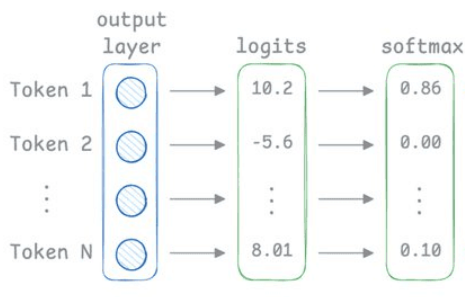

In [ ]:
Image('/content/softmax.png', width=500) if IN_COLAB else display(Image(filename='softmax.png'))

Video su logit_vs_softmax.

In [ ]:
from IPython.display import Video
Video("Softmax_ita.mp4", width=600, height=400, embed=True)


## Definire una *loss function* di training

Definire una funzione di perdita per l’addestramento utilizzando `losses.SparseCategoricalCrossentropy`:

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

La funzione di perdita prende un vettore di valori di "verità di base" (*ground truth*) e un vettore di logit e restituisce una perdita scalare per ogni esempio. Questa perdita è uguale al logaritmo negativo della probabilità della classe vera: la perdita è zero se il modello è sicuro della classe corretta.

Questo modello non addestrato fornisce probabilità prossime alla casualità (1/10 per ciascuna classe), quindi la perdita iniziale dovrebbe essere prossima a `-tf.math.log(1/10) ~= 2.3`.

Vediamone un'applicazione:

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

## Compilare il modello

Prima di iniziare l'addestramento, configurare e compilare il modello utilizzando `Model.compile` di keras.

Impostare l’[`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) su `adam`, impostare la perdita sulla funzione `loss_fn` definita in precedenza e specificare una metrica da valutare per il modello impostando il parametro `metrics=accuracy`.


In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Addestrare il modello

### Il fit (adattamento)

Usare il metodo `Model.fit` per adattare i parametri del modello e minimizzare la loss:

In [ ]:
model.fit(x_train, y_train, epochs=5)

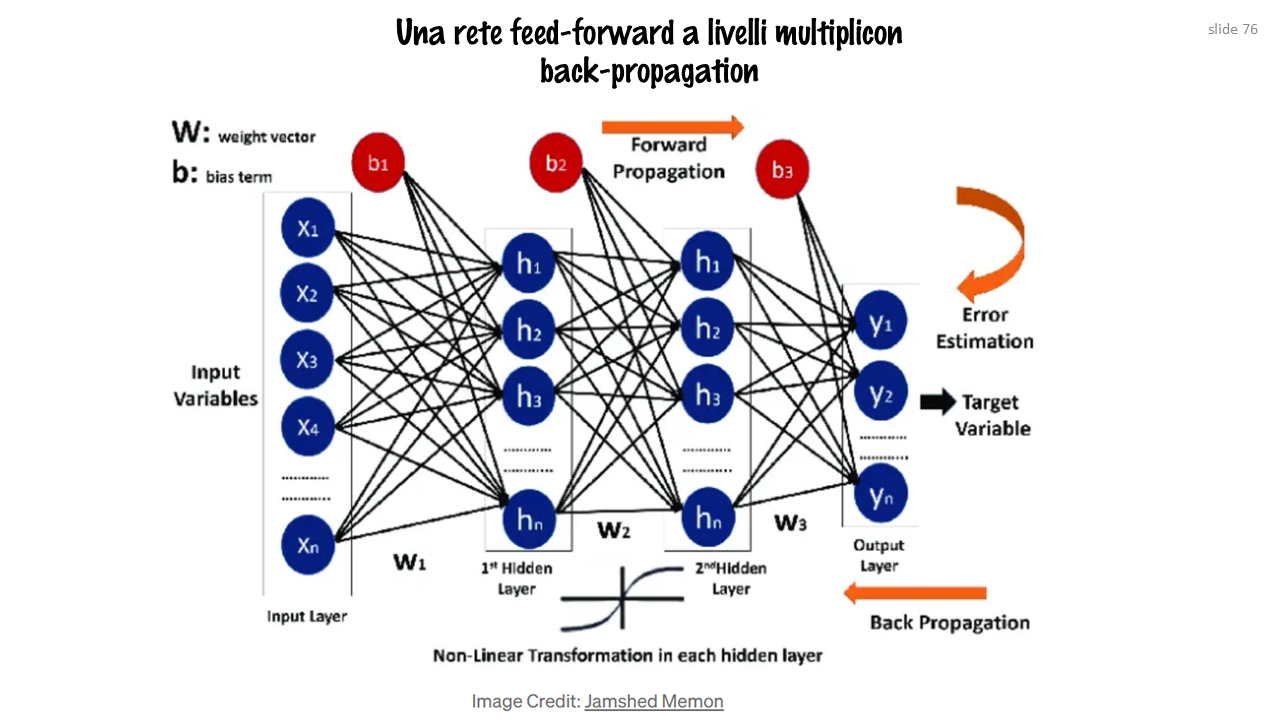

In [7]:
Image('/content/MLP_con_backpropagation.png', width=1000) if IN_COLAB else display(Image(filename='MLP_con_backpropagation.png'))

### La backpropagation

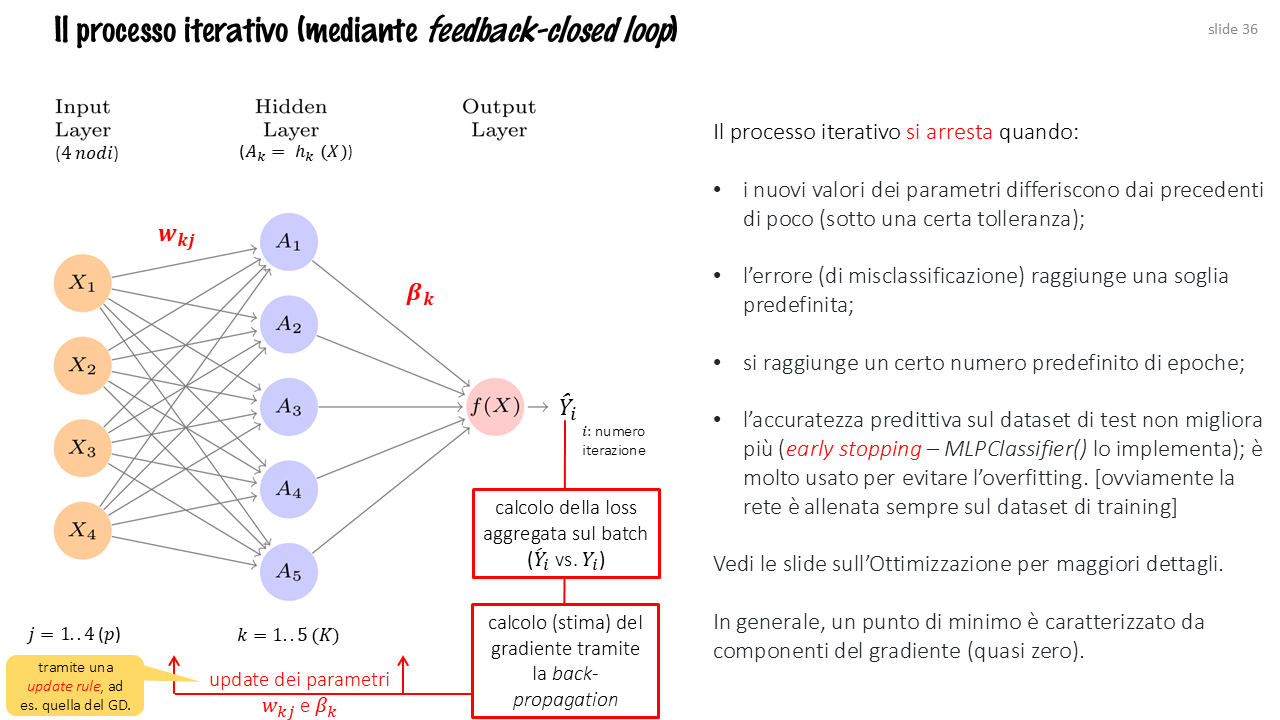

In [8]:
Image('/content/backpropagation.png', width=1000) if IN_COLAB else display(Image(filename='backpropagation.png'))

### La discesa del gradiente

Eseguire la cella seguente per scaricare nella *storage session* il file PDF ***Discesa_Gradiente*** e poi fare <u>doppio click</u> sopra per aprirlo.

In [10]:
if IN_COLAB:
  from google.colab import files
  uploaded = files.upload()  # si aprirà un prompt per caricare il PDF

Saving Discesa_Gradiente.pdf to Discesa_Gradiente.pdf


## Valutare il modello

Il metodo  `Model.evaluate` calcola le prestazioni (predittive) del modello, in genere su un [dataset di validazione](https://developers.google.com/machine-learning/glossary#validation-set) o su un [dataset di test](https://developers.google.com/machine-learning/glossary#test-set).

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

Il classificatore di immagini è ora allenato con un’accuratezza di test di circa il 98% su questo dataset MNIST. Per approfondire, consultare i [tutorial TensorFlow](https://www.tensorflow.org/tutorials/).

Se si desidera che il modello restituisca probabilità, è possibile incapsulare il modello allenato e collegarvi la funzione `softmax`:

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

Qui sotto le probabilità di classe per le prime 5 immagini di test:

In [ ]:
probability_model(x_test[:5])

## Il trade-off tra bias e varianza

Nel ML tradizionale vale il seguente famoso [trade-off](https://it.wikipedia.org/wiki/Compromesso_bias-varianza).<br>
Si veda la seguente famosa figura, con l'importanza di valutare le prestazioni sul test dataset, in modo da ridurre il rischio di [overfitting](https://it.wikipedia.org/wiki/Overfitting). [La figura di Wikipedia è fuorviante]

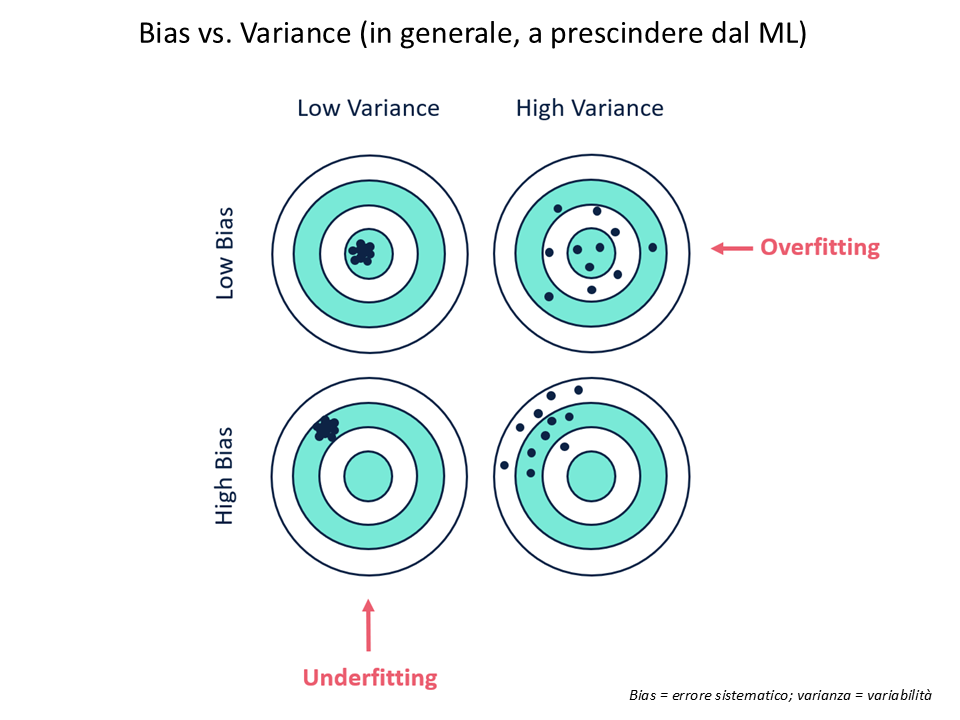

In [ ]:
Image('/content/bias_vs_varianza.png') if IN_COLAB else display(Image(filename='bias_vs_varianza.png'))

In [ ]:
Image('/content/bias_varianza_tradeoff.png') if IN_COLAB else display(Image(filename='bias_varianza_tradeoff.png'))

In [ ]:
Image('/content/overfit_vs_underfit.png') if IN_COLAB else display(Image(filename='overfit_vs_underfit.png'))

In [ ]:
Image('/content/loss_function.png') if IN_COLAB else display(Image(filename='loss_function.png'))

Per il RMSE vedi la [voce Wikipedia](https://en.wikipedia.org/wiki/Root_mean_square_deviation).<br>
[Qui](https://www.tiktok.com/@brainlink_project/video/7569353458864721174?is_from_webapp=1&sender_device=pc) il link al video di *brainlink* sulla cross-entropia categorica.

In [ ]:
Image('/content/RMSE.png') if IN_COLAB else display(Image(filename='RMSE.png'))

## Conclusione

Complimenti! È stato addestrato un modello di machine learning utilizzando un dataset già pronto tramite l’API [Keras](https://www.tensorflow.org/guide/keras/overview).

Per altri esempi d’uso di Keras, consultare i [tutorial](https://www.tensorflow.org/tutorials/keras/). Per approfondire la costruzione di modelli con Keras, leggere le [guide](https://www.tensorflow.org/guide/keras). Per saperne di più su caricamento e preparazione dei dati, vedere i tutorial su [image data loading](https://www.tensorflow.org/tutorials/load_data/images) o [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).

# Una rete TensorFlow per "german credit data"

Sono dati tabellari (strutturati). Adotteremo un approccio completo e “pulito”, con uno stile classico:
* split train/test
* preprocessing separato (fit su train, trasformazione train e test)
* fit keras (binary classification)
* metriche chiare

CSV locale per maggiore stabilità.

📌Mai: fare one-hot su tutto il dataset prima dello split (= *leakage*), vedi più avanti.

C'è anche un'alternativa “moderna” con `tf.data` + normalizzazione dentro TF: è una pipeline più “TensorFlow puro”, si può fare.

👉 Però con tabellari misti (numerici e categorici) scikit-learn + OneHotEncoding restano spesso la via più stabile.

## Import dei package

In [ ]:
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split                                # split dataset
from sklearn.preprocessing import StandardScaler                                    # classe per standardizzare i dati
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # calcolo delle metriche

## Caricamento dati

In [ ]:
df = pd.read_csv("german_credit_data.csv")  # adatti il nome file

In [ ]:
df.head()

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df.head()

E' bene che i nomi delle colonne non contengano spazi:

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')   # sostituisce lo spazio con undescore:
df.head()

**Note importanti sul German Credit (per non farsi male)**

* `Target`: attenzione a come è codificato (spesso good/bad o 1/2). La mappatura deve essere coerente.

* **One-hot e multicollinearità**: nel deep learning non è un problema “statistico” come nella regressione lineare; tuttavia conviene evitare colonne inutili e tenere il preprocessing ordinato (come sopra).

* **Metriche**: su dataset sbilanciati, **AUC e Recall/Precision** sono più informative della sola accuracy. Per semplicità useremo la accuratezza.

* **Threshold prob** = 0.5: è una convenzione; si può tarare (es. massimizzare F1 o un recall minimo). Vedi più avanti.

Vediamo ora se il dataset è abbastanza bilanciato:

In [ ]:
df["risk"].value_counts()


Sì, è bilanciato, stesso ordine di grandezza.<br>
Se non lo fosse stato, ci sarebbero state <u>diverse possibilità</u>:
- sovra-campionamento classe rara
- sotto-campionamento classe frequente
- approccio ibrido (SMOTE)
- pesi delle classi

Vediamo un attimo l'ultima scelta: si può dare più peso agli errori su quella classe durante il training usando `class_weight`. Non cambia l’architettura né il preprocessing: interviene solo sulla funzione di loss.<br>
Vediamo il **codice esemplificativo** (senza eseguirlo).

```python
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.array([0, 1])  # 0=good, 1=bad

weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)

class_weight = {
    0: weights[0],
    1: weights[1]
}

print(class_weight)
```

## Preparazione delle colonne

In [ ]:
predictors = [
    "age",
    "sex",
    "job",
    "housing",
    "saving_accounts",
    "checking_account",
    "credit_amount",
    "duration",
    "purpose"
]
outcome = "risk"

In keras è più comodo usare direttamente `df["risk"]`, oppure l'equivalente `df[outcome]` con `outcome="risk"`, perché restituisce un vettore 1-dimensionale, che è esattamente il formato atteso da una classificazione binaria.<br>
Al contrario:
```python
  outcome = ["risk"]
```
non è consigliabile.

**Reminder**
```python
y1 = df["risk"]     # Series → shape (n,)
y2 = df[["risk"]]   # DataFrame → shape (n, 1)
```

Se `y` è una *Series*:
- match naturale con `binary_crossentropy`
- meno conversioni implicite
- meno warning su *shape*

Cioè, in altri termini: usare `y = df["risk"]` **è comodo** perché produce **un vettore 1D (Series)**, che si **sposa direttamente con `Dense(1, sigmoid)`** (vedi il modello keras più avanti) e `binary_crossentropy`, senza dover gestire `shape (n,1)`.

Se `y` è un *DataFrame*:
- Keras lo converte comunque<br>
ma:
- a volte serve `.values`
- a volte compaiono warning su dimensionalità
- nelle metriche/plot può essere più scomodo

---
**In sintesi: `outcome = "risk"` non è un vincolo matematico**.<br>
È solo:
- coerenza con le API Keras
- semplicità operativa
- meno attrito nel training

Infatti funzionerebbe anche:
```python
y = df[["risk"]].values
```
ma non porta vantaggi in questo caso.



In [ ]:
X = df[predictors]
y = df[outcome].map({"good": 0, "bad": 1}).astype(int) # 1 è l'evento di interesse, qui "bad"
                                                       # Classe positiva: con bad=1, AUC/Recall/Precision si riferiscono al “rischio alto”.

In [ ]:
display(X.head())
y.head()

In [ ]:
display(X.head())

In [ ]:
# (consigliato) uniforma NaN nelle categoriche prima delle dummy
cat_cols = ["sex", "housing", "saving_accounts", "checking_account", "purpose"]
X[cat_cols] = X[cat_cols].fillna("missing")

## Split del dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Dummizzazione (pandas)
Perché serve?<br>
Le reti neurali lavorano su input numerici. Variabili come:
- `Checking_account`
- `Purpose`
- `Housing`
- ecc.

sono categorie nominali: senza trasformazione la rete non può usarle.<br>
👉 **I predittori categorici con le reti neurali vanno dummizzati**, mentre quelli numerici vanno tipicamente **standardizzati**.


**Drop di una dummy?**

Nella regressione lineare classica si usa $(k−1) per evitare multicollinearità.<br>
Nel deep learning non è necessario: la rete non stima coefficienti lineari in forma chiusa e la collinearità non crea instabilità nello stesso senso.<br>
Quindi:
- possiamo lasciare tutte le dummy
- oppure usare `drop="first"` per ridurre la dimensionalità (non per obbligo statistico, solo per compattezza)

**Alternative (quando le categorie sono molte)**:<br>
German Credit ha cardinalità moderate, quindi la one-hot è perfetta.<br>
Altre opzioni (più avanzate):
- embedding layer (approccio tipico DL tabellare)
- target encoding

Ma qui non servono proprio.

In [ ]:
X_train_dum = pd.get_dummies(X_train, drop_first=False)
X_test_dum  = pd.get_dummies(X_test, drop_first=False)

Ora l'importante passo dell'**allineamento** delle colonne del test dataset a quelle del training dataset.

In [ ]:
X_test_dum = X_test_dum.reindex(columns=X_train_dum.columns, fill_value=0)

La riga della cella precedente è fondamentale quando si usa `get_dummies`:
```python
  X_test_dum = X_test_dum.reindex(columns=X_train_dum.columns, fill_value=0)
```

Serve a garantire che train e test abbiano esattamente **le stesse feature nello stesso ordine dopo la dummizzazione**.

Con `pd.get_dummies`, infatti, le colonne create dipendono dalle categorie presenti nel dataset al quale `pd.get_dummies` viene applicato. Train e test non hanno necessariamente le stesse categorie.

Dunque questa riga serve a evitare:
- mismatch di feature
- crash del modello
- encoding incoerente



## Standardizzazione (solo predittori numerici originali)

In [ ]:
num_cols = ["age", "job", "credit_amount", "duration"]

In [ ]:
# Se per caso qualcuno è stato letto come stringa, lo forziamo a numerico
for c in num_cols:
    X_train_dum[c] = pd.to_numeric(X_train_dum[c], errors="coerce")
    X_test_dum[c]  = pd.to_numeric(X_test_dum[c], errors="coerce")

# Eventuali NaN numerici -> imputazione semplice (mediana del train)
for c in num_cols:
    med = X_train_dum[c].median()
    X_train_dum[c] = X_train_dum[c].fillna(med)
    X_test_dum[c]  = X_test_dum[c].fillna(med)


In [ ]:
scaler = StandardScaler()                                               # istanziazione
X_train_dum[num_cols] = scaler.fit_transform(X_train_dum[num_cols])     # fit e transform (sul training dataset)
X_test_dum[num_cols]  = scaler.transform(X_test_dum[num_cols])          # solo transform (sul test dataset)


## FIX dtype
Tutto numerico + float32 per TF.


In [ ]:
X_train_np = X_train_dum.to_numpy(dtype=np.float32)
X_test_np  = X_test_dum.to_numpy(dtype=np.float32)

y_train_np = y_train.to_numpy(dtype=np.int32)
y_test_np  = y_test.to_numpy(dtype=np.int32)

Il codice della cella precedente fa una cosa molto semplice (ma decisiva per TensorFlow): **trasforma i DataFrame/Series di pandas in array NumPy con un tipo numerico “pulito”**.

```python
X_train_np = X_train_dum.to_numpy(dtype=np.float32)
X_test_np  = X_test_dum.to_numpy(dtype=np.float32)

y_train_np = y_train.to_numpy(dtype=np.int32)
y_test_np  = y_test.to_numpy(dtype=np.int32)
```

**1) `X_train_dum.to_numpy(dtype=np.float32)`**

* prende il DataFrame `X_train_dum` (dopo dummizzazione + scaling)
* lo converte in una matrice NumPy 2D
* **forzando il tipo** a `float32`

Perché serve:

* Keras/TensorFlow non accetta colonne con dtype `object`
* `float32` è il formato standard (più compatibile e spesso più veloce di `float64`)

Risultato:

* `X_train_np.shape == (n_train, n_features)`
* tutte le feature sono numeriche float

**2) `y_train.to_numpy(dtype=np.int32)`**

* converte la Series `y_train` in un vettore NumPy
* forzando il tipo a `int32`

Perché:

* le etichette binarie sono 0/1
* `int32` è un tipo intero semplice e sempre accettato

Risultato:

* `y_train_np.shape == (n_train,)`
* valori interi 0/1

**Perché è utile (in pratica)**

Evita esattamente questo errore:

> `ValueError: Invalid dtype: object`

Perché anche **una sola colonna** rimasta `object` in pandas rende `.values` un array “misto” e TensorFlow lo rifiuta. Con `dtype=np.float32` si impone: “o tutto numerico, oppure fallisce prima” (e comunque non arriva a Keras con dtype sbagliato).


In alternativa, si poteva controllare prima della conversione se nel DataFrame erano rimaste colonne con *dtype* `object` (cioè non numeriche), bastava ispezionare i tipi.

## Data leakage?
Per evitare il [**data leakage**](https://en.wikipedia.org/wiki/Leakage_(machine_learning)) è **indispensabile standardizzare i dati DOPO lo split**.

La standardizzazione infatti stima 2 parametri dai dati:
* media
* deviazione standard

Se si standardizza **prima** dello split, queste statistiche vengono calcolate usando **anche il test set**. In quel momento, quindi, il modello “vede” indirettamente informazioni che dovrebbe ignorare fino alla valutazione finale.<br>

👉 È una contaminazione sottile ma reale. Simile a questa è la *feature selection* prima dello split!! (Hastie & Tibshirani).

---

**Cosa succede matematicamente**<br>
Standardizzare significa: $x^{*} = \frac{x - \mu}{\sigma}$.<br>
Se μ e σ sono calcolati su tutto il dataset:<br>
$\mu = \mu_{train+test}, \quad \sigma = \sigma_{train+test}$.

📌 Allora la trasformazione del train **incorpora informazione del test**.
Il modello non è più addestrato in isolamento.

---

**La procedura corretta (sempre)**:<br>
Ordine corretto:
1. split train/test
2. stimare μ e σ **solo sul train**
3. applicare la stessa trasformazione:
   * al train
   * al test

In sklearn:
```python
  preprocess.fit(X_train)      # stima media e std
  X_train_p = preprocess.transform(X_train)
  X_test_p  = preprocess.transform(X_test)
```

---

## Perché è importante davvero
Per evitare il data leakage. Se si standardizza prima:
* metriche test troppo ottimistiche
* rischio di overfitting mascherato
* confronto tra modelli non affidabile

Questo vale per:
* standardizzazione
* PCA
* imputazione
* encoding supervisionati
* feature selection

Tutto ciò che “impara” dai dati va fittato solo sul train.

---

**Intuizione semplice**

Il test set rappresenta il futuro.
Nel mondo reale:

* oggi si allena il modello
* domani arrivano dati nuovi

Non si può conoscere in anticipo:

* media futura
* distribuzione futura

Standardizzare dopo lo split replica esattamente questo scenario operativo.


## Modello keras

Il dataset *German Credit* è piccolo (~1000 righe).<br>
Con una MLP:
- non serve rete grande
- rischio overfitting alto

usare:
- [dropout](https://en.wikipedia.org/wiki/Dilution_(neural_networks))
- [early stopping](https://en.wikipedia.org/wiki/Early_stopping)
-  poche hidden units (principio di parsimonia)

Ma cosa è una [rete neurale MLP](https://it.wikipedia.org/wiki/Percettrone_multistrato)?

Ecco qui sotto un esempio di architettura coerente:

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_np.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

## Criteri
La “pila” (architettura della rete) è stata scelta con criteri molto pragmatici, legati a tre fattori specifici del problema:

* dataset piccolo (~1000 osservazioni)
* dati tabellari
* classificazione binaria

Non è una struttura arbitraria: è una configurazione volutamente sobria per evitare overfitting.

---

**1) Numero di layer**

```text
Input → Dense(32) → Dense(16) → Output(1)
```

Criterio:
* sui tabellari raramente servono reti profonde
* 1–2 hidden layer sono lo standard
* più layer:
  * aumentano varianza
  * non portano benefici su dataset piccoli

Storicamente (prima del DL “deep” sui tabellari):
* MLP shallow funzionavano meglio delle architetture profonde.

---

**2) Numero di neuroni**

```text
32 → 16
```

Criterio empirico classico:
* dimensione comparabile al numero di feature dopo dummizzazione
* progressiva compressione dell’informazione
* evitare modelli troppo capienti

Regola pratica:
$$\text{neuroni primo layer} \approx 1\text{–}3 \times \text{numero feature}$$
poi si riduce:
$$32 \to 16 \to 1$$

---

**3) Attivazioni**

```python
relu
```

Perché:
* stabile
* veloce
* evita saturazioni tipiche di sigmoid/tanh negli hidden layer

È lo standard per MLP tabellari.

Output:
```python
sigmoid
```

Perché:
$$P(Y=1|X)$$

serve probabilità per classificazione binaria.

Vedi dopo per **definizione del sigmoide** e delle **funzioni di attivazione più popolari**.
---

**4) Loss**

```python
binary_crossentropy
```

Motivo teorico:
* deriva dalla massima verosimiglianza
* coincide con logistic regression loss

È la scelta naturale per:
$$
y \in {0,1}$$

---

**5) Dropout**

```python
Dropout(0.2)
```

Criterio:
* dataset piccolo → alto rischio overfitting
* dropout introduce regolarizzazione
* 0.2 è valore conservativo (non aggressivo)

---

**6) Ottimizzatore**

```python
Adam(lr=1e-3)
```

Scelta standard perché:
* robusto
* richiede poca calibrazione
* funziona bene su dati tabellari

Non serve SGD “puro” su problemi così piccoli.

---

**7) Early stopping**

```python
monitor = val_auc
```

Perché:
* accuracy può essere fuorviante con classi sbilanciate
* AUC è più stabile
* ferma il training prima dell’overfitting

---

**8) Perché non una rete più grande**

Con German Credit, se si usa:

```text
128 → 64 → 32 → 16
```

succede tipicamente:
* training accuracy altissima
* test AUC peggiora
* modello instabile

Segnale classico di overfitting.

---

**9) Intuizione generale**

Questa architettura segue una filosofia precisa:

> sui dati tabellari piccoli, la potenza del modello sta più nel preprocessing che nella profondità della rete.

In effetti:
* dummizzazione
* scaling
* gestione class imbalance

incidono più dell’architettura.

---

**10) Come si configurerebbe “seriamente”**

Una configurazione rigorosa richiederebbe:
* grid search su:
  * neuroni
  * dropout
  * learning rate
* cross-validation

E spesso emerge qualcosa del tipo:

```text
Dense(16) → Dense(8) → Output
```

cioè ancora più semplice.

---

**Sintesi**

La pila è stata definita con criteri:
* parsimonia
* stabilità
* prevenzione overfitting
* coerenza con letteratura MLP su dati tabellari

📌 Non è una “architettura deep”: è una **MLP classica**, che su German Credit è esattamente ciò che funziona meglio.


# Funzioni di attivazione

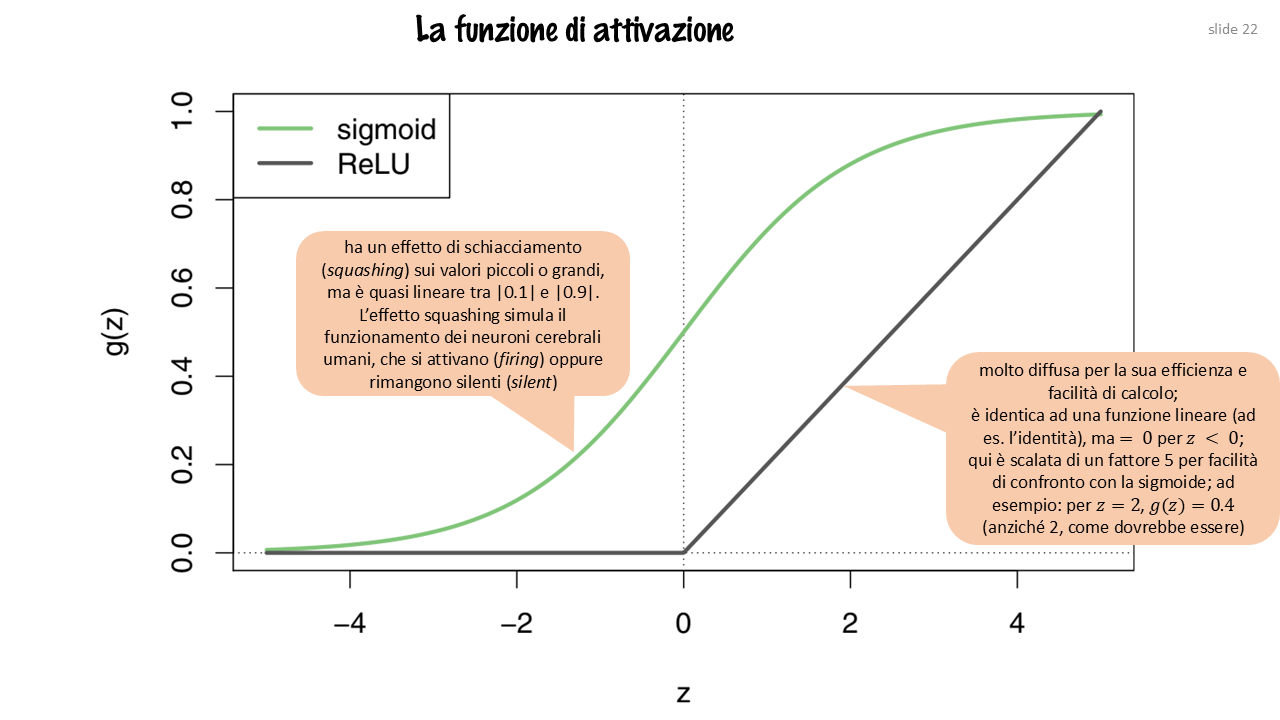

In [ ]:
Image('/content/sigmoide.png', width=1000) if IN_COLAB else display(Image(filename='sigmoide.png'))

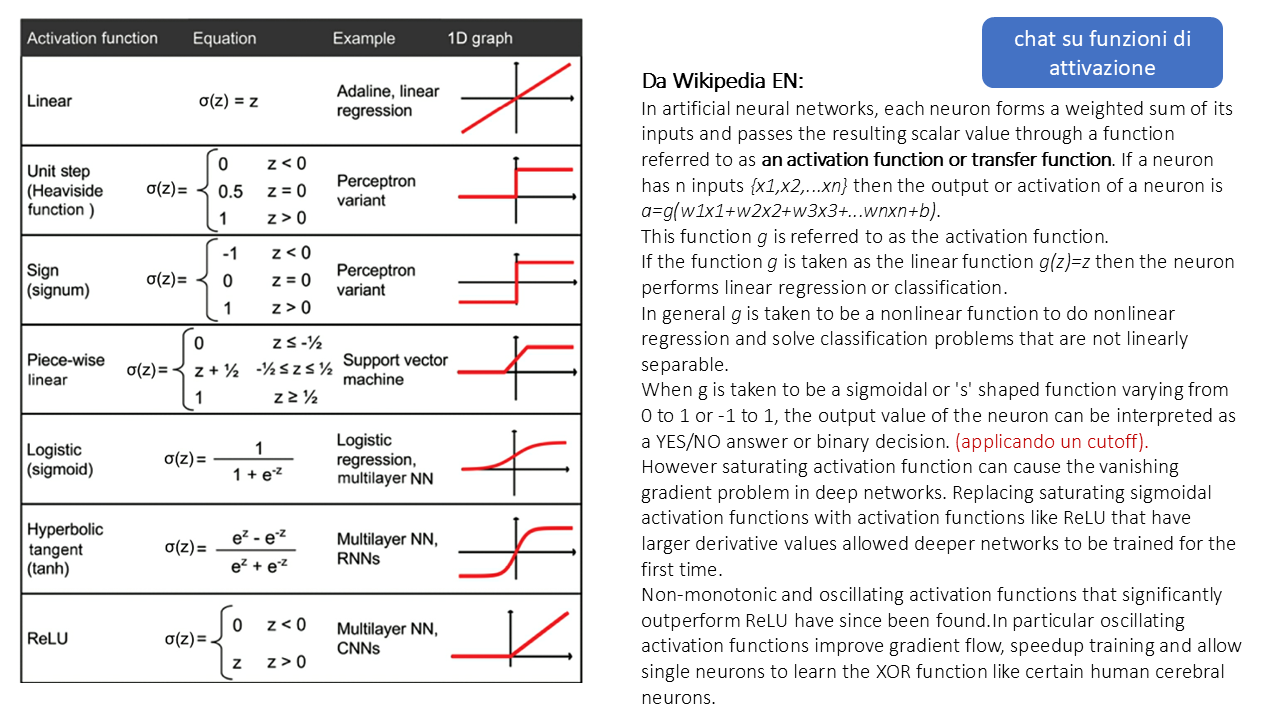

In [ ]:
Image('/content/funzioni_attivazione.png', width=1000) if IN_COLAB else display(Image(filename='funzioni_attivazione.png'))

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=[tf.keras.metrics.BinaryAccuracy(name="acc")]
)

Un modello Keras si “compila” perché, prima dell’addestramento, deve essere definito **come** imparare dai dati.

La rete, così com’è dopo aver definito i layer, è solo una struttura matematica; non sa ancora:
* quale errore minimizzare
* come aggiornare i pesi
* quali metriche monitorare

La `compile()` serve a specificare questi elementi.

---

**Cosa succede quando si chiama `model.compile()`**

Si fissano tre componenti fondamentali.

**1) Funzione di loss**

Definisce cosa significa “sbagliare”.<br>
Esempio:

```python
  loss = "binary_crossentropy"
```

Traduce:
$$\text{errore} = f(y_{vero}, y_{predetto})$$

È l’equivalente della funzione obiettivo nella regressione classica.

---

**2) Ottimizzatore**

Definisce **come** aggiornare i pesi per ridurre la loss.<br>
Esempio:

```python
  optimizer = Adam
```

Cioè:
* gradient descent adattivo
* passo automatico sui parametri

Senza ottimizzatore la rete non può imparare.

---

**3) Metriche**

Definiscono cosa monitorare durante training e validazione.<br>
Esempio:

```python
  metrics = ["accuracy"]
```

Non influenzano l’apprendimento, ma permettono di valutare il modello.

---

**Analogia classica**

Nella regressione lineare:
* si definisce la funzione dei minimi quadrati
* si sceglie l’algoritmo di stima
* si valutano R², MSE, ecc.

In Keras:
* `loss` = funzione dei minimi quadrati/log-likelihood
* `optimizer` = algoritmo numerico di stima
* `metrics` = indicatori di performance

---

**Perché è un passaggio separato**

Storicamente (e concettualmente):
* definizione del modello → struttura matematica
* compilazione → definizione del problema di ottimizzazione
* fit → stima dei parametri

Separare i passaggi permette di:
* cambiare loss senza rifare la rete
* usare ottimizzatori diversi
* riutilizzare la stessa architettura per regressione o classificazione

---

**In sintesi**

`model.compile()` trasforma una rete da<br>
→ oggetto matematico statico<br>
a<br>
→ modello addestrabile con una regola precisa di apprendimento.


## Fit (early stopping su `val_acc`):

In [ ]:
early = tf.keras.callbacks.EarlyStopping(
    monitor="val_acc", mode="max", patience=10, restore_best_weights=True
)

In [ ]:
history = model.fit(
    X_train_np,
    y_train_np,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early],
    verbose=1
)


## Valutazione accuratezza

In [ ]:
loss, acc = model.evaluate(X_test_np, y_test_np, verbose=0)
print({"loss": float(loss), "acc": float(acc)})

In [ ]:
y_prob = model.predict(X_test_np, verbose=0).ravel()
y_pred = (y_prob >= 0.5).astype(int)

La soglia **0.5** serve a trasformare la probabilità prodotta dalla rete in una decisione di classe.

Il modello con `sigmoid` in uscita restituisce:
$p = P(\text{bad} \mid X)$, cioè un numero tra 0 e 1.

Per ottenere la previsione finale bisogna decidere quando dire “bad” e quando “good”. La regola standard è:

```python
y_pred = (y_prob >= 0.5).astype(int)
```

Quindi:

* se ( p \ge 0.5 ) → classe **bad**
* se ( p < 0.5 ) → classe **good**

---

Perché proprio 0.5?<br>
Perché è il punto neutro:
* sopra → più probabile “bad”
* sotto → più probabile “good”

È l’equivalente della decision rule nella regressione logistica classica.

---

Non è obbligatoria!
La soglia si può cambiare se l’obiettivo non è “simmetrico”.<br>
Esempi tipici nel credito:
* meglio ridurre i falsi negativi (non concedere credito a chi è rischioso)
* si usa una soglia più bassa:

```text
0.3 oppure 0.4
```
Così il modello classifica più facilmente come “bad”.

Oppure:
* se si vuole concedere più credito possibile:
* si alza la soglia (0.6–0.7)

---

Punto chiave

Il modello produce **probabilità**.<br>
La soglia serve a trasformarle in **decisioni operative**.

Accuratezza, confusion matrix ecc. dipendono direttamente da questa scelta.


In [ ]:
print("Accuracy (sklearn):", accuracy_score(y_test_np, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test_np, y_pred))
print(classification_report(y_test_np, y_pred, digits=3))